In [ ]:
#ANALYSING MODELS AND DATA

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MLZILLA Processed Dataset.xlsx to MLZILLA Processed Dataset.xlsx


In [ ]:
# importing required libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('MLZILLA Processed Dataset.xlsx')
df.head()
#df _ raw

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,CustomerLifetimeValue,NetPromoterScore,AverageCallDuration,NumberOfComplaints,BillingCycle,NumberOfDependents,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,InternetService_OutlierService,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PreferredContactMethod_Phone,PreferredContactMethod_SMS,Churn
0,0,-1.304043,-1.571643,-1.002320,-1.424756,1.591807,-1.592692,-0.903816,-1.093786,-0.435744,True,True,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,0
1,0,-1.304043,-1.569914,-1.002296,1.186999,-0.443924,1.363321,-1.496913,-0.746441,1.368361,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,True,False,0
2,0,-1.304043,-1.568185,-1.002273,1.099147,-0.180683,-0.287150,-0.310718,-0.746441,-1.337797,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True,True,False,0
3,0,-1.304043,-1.564727,-1.002227,-0.584428,-1.619735,1.064650,-1.496913,-1.325349,-1.337797,False,True,True,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,0
4,0,-1.304043,-1.561270,-1.002181,0.492298,-0.672067,0.315725,0.875477,0.874504,-0.435744,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True,False,True,0


In [ ]:
print(df.shape, df.columns)

(6552, 40) Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'CustomerLifetimeValue', 'NetPromoterScore', 'AverageCallDuration',
       'NumberOfComplaints', 'BillingCycle', 'NumberOfDependents',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'InternetService_OutlierService', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic ch

In [ ]:
# Identify continuous variables (excluding binary ones)
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns
continuous_vars

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'CustomerLifetimeValue', 'NetPromoterScore', 'AverageCallDuration',
       'NumberOfComplaints', 'BillingCycle', 'NumberOfDependents', 'Churn'],
      dtype='object')

In [ ]:
#FOR PLOTTING THE CURVES WE DEFINE THE NUMBER OF BINS REQUIRED USING STURGES RULE
import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Use the number of columns in your dataset
num_data_points = df.shape[0]
bins = sturges_rule(num_data_points)

print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 13


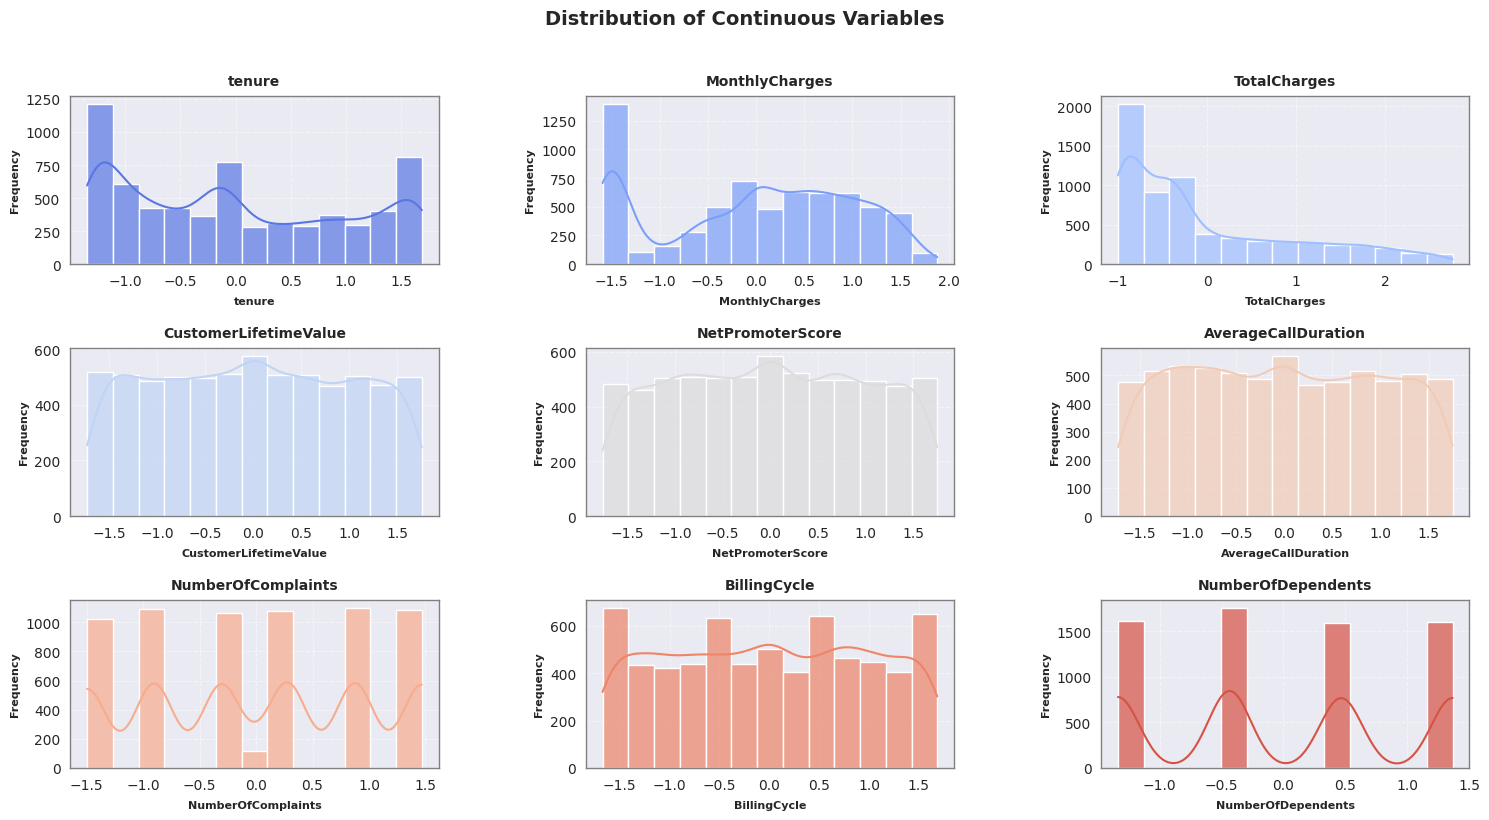

In [ ]:
# Exclude binary variables
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Set number of bins according to Sturges' Rule
num_bins = bins

# Set Seaborn theme
sns.set_style("darkgrid")

# Define layout
n_cols = 3
n_rows = (len(continuous_vars) // n_cols) + (1 if len(continuous_vars) % n_cols != 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

# Plot distributions
for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, bins=num_bins, kde=True, color=sns.color_palette("coolwarm", len(continuous_vars))[i % len(continuous_vars)],
                 alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(var, fontsize=8, fontweight='bold', labelpad=6)
    axes[i].set_ylabel('Frequency', fontsize=8, fontweight='bold')
    axes[i].set_title(f'{var}', fontsize=10, fontweight='bold', pad=8)
    axes[i].grid(True, linestyle='--', alpha=0.5)

    # Add border around the plot
    for spine in axes[i].spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1)

# Turn off unused subplots
for i in range(len(continuous_vars), len(axes)):
    axes[i].axis('off')

# Set a figure-level title
fig.suptitle('Distribution of Continuous Variables', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust spacing
plt.show()

In [ ]:
df[continuous_vars].skew()

,0
tenure,0.284874
MonthlyCharges,-0.230127
TotalCharges,1.033028
CustomerLifetimeValue,0.013149
NetPromoterScore,0.003229
AverageCallDuration,0.031769
NumberOfComplaints,-0.014163
BillingCycle,-0.005452
NumberOfDependents,0.036028


In [ ]:
#Plotting the correlation of different factors with the churn

In [ ]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,CustomerLifetimeValue,NetPromoterScore,AverageCallDuration,NumberOfComplaints,BillingCycle,NumberOfDependents,Churn
0,0,-1.304043,-1.571643,-1.002320,-1.424756,1.591807,-1.592692,-0.903816,-1.093786,-0.435744,0
1,0,-1.304043,-1.569914,-1.002296,1.186999,-0.443924,1.363321,-1.496913,-0.746441,1.368361,0
2,0,-1.304043,-1.568185,-1.002273,1.099147,-0.180683,-0.287150,-0.310718,-0.746441,-1.337797,0
3,0,-1.304043,-1.564727,-1.002227,-0.584428,-1.619735,1.064650,-1.496913,-1.325349,-1.337797,0
4,0,-1.304043,-1.561270,-1.002181,0.492298,-0.672067,0.315725,0.875477,0.874504,-0.435744,0
...,...,...,...,...,...,...,...,...,...,...,...
6547,0,-0.376753,0.655113,-0.370410,1.179831,-0.672067,0.774927,0.282379,1.684976,1.368361,0
6548,0,0.381938,0.006238,-0.370410,0.594586,0.012360,0.381293,0.282379,0.064032,1.368361,1
6549,0,-0.208155,0.006238,-0.370410,1.446873,1.065325,0.796252,-0.903816,0.527159,-0.435744,0
6550,0,-0.123856,-0.153987,-0.370410,1.116527,1.082874,-1.615125,-1.496913,0.411377,1.368361,1


In [ ]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,CustomerLifetimeValue,NetPromoterScore,AverageCallDuration,NumberOfComplaints,BillingCycle,NumberOfDependents,Churn
SeniorCitizen,1.000000,0.008914,0.210767,0.093623,-0.002836,0.013457,0.015860,-0.005240,-0.008817,0.015678,0.151276
tenure,0.008914,1.000000,0.221820,0.783061,0.018933,-0.007349,0.004539,-0.007577,-0.003077,-0.003774,-0.339422
MonthlyCharges,0.210767,0.221820,1.000000,0.606094,-0.019130,-0.014999,0.023952,0.003569,-0.029455,-0.012006,0.192912
TotalCharges,0.093623,0.783061,0.606094,1.000000,0.002635,-0.007997,0.008682,0.002288,-0.011971,-0.002133,-0.191714
CustomerLifetimeValue,-0.002836,0.018933,-0.019130,0.002635,1.000000,0.016639,-0.023282,-0.013909,-0.001291,-0.011053,-0.018000
NetPromoterScore,0.013457,-0.007349,-0.014999,-0.007997,0.016639,1.000000,-0.020773,0.013272,0.012010,0.006425,-0.016823
AverageCallDuration,0.015860,0.004539,0.023952,0.008682,-0.023282,-0.020773,1.000000,0.002151,0.008010,0.006754,0.014691
NumberOfComplaints,-0.005240,-0.007577,0.003569,0.002288,-0.013909,0.013272,0.002151,1.000000,-0.022326,0.008356,0.014472
BillingCycle,-0.008817,-0.003077,-0.029455,-0.011971,-0.001291,0.012010,0.008010,-0.022326,1.000000,0.003717,-0.004829
NumberOfDependents,0.015678,-0.003774,-0.012006,-0.002133,-0.011053,0.006425,0.006754,0.008356,0.003717,1.000000,0.014775


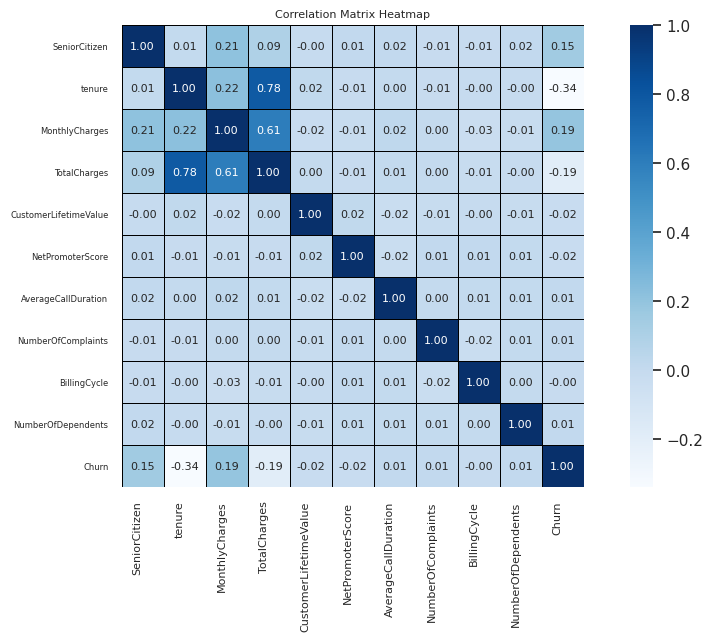

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', square=True, fmt=".2f",
            annot_kws={"size": 8}, linewidths=0.5, linecolor='black')

plt.xticks(rotation=90, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=6)
plt.title('Correlation Matrix Heatmap', fontsize=8)
plt.show()

In [ ]:
# Define color mapping function
def get_color(value):
    if value > 0.7:
        return '#234F1E'  # Pine
    elif value > 0.5:
        return '#028A0F'  # Emerald
    elif value > 0.3:
        return '#3DED97'  # Seafoam
    elif value > 0:
        return '#728C69'  # Sage
    elif value > -0.3:
        return '#E3242B'  # Rose
    elif value > -0.5:
        return '#D21404'  # Candy
    elif value > -0.7:
        return '#990F02'  # Cherry
    else:
        return '#4E0707'  # Wine

In [ ]:
# Compute correlation with churn
corr_matrix = df.corr()
corr_churn = corr_matrix['Churn'].round(3).sort_values(ascending=False).drop('Churn')
print(corr_churn)

PaymentMethod_Electronic check           0.296
InternetService_Fiber optic              0.268
PaperlessBilling_Yes                     0.195
MonthlyCharges                           0.193
SeniorCitizen                            0.151
StreamingMovies_Yes                      0.069
StreamingTV_Yes                          0.067
MultipleLines_Yes                        0.042
AverageCallDuration                      0.015
NumberOfDependents                       0.015
NumberOfComplaints                       0.014
PhoneService_Yes                         0.008
PreferredContactMethod_Phone            -0.004
BillingCycle                            -0.005
PreferredContactMethod_SMS              -0.008
MultipleLines_No phone service          -0.009
NetPromoterScore                        -0.017
gender_Male                             -0.017
CustomerLifetimeValue                   -0.018
InternetService_OutlierService          -0.026
DeviceProtection_Yes                    -0.061
OnlineBackup_

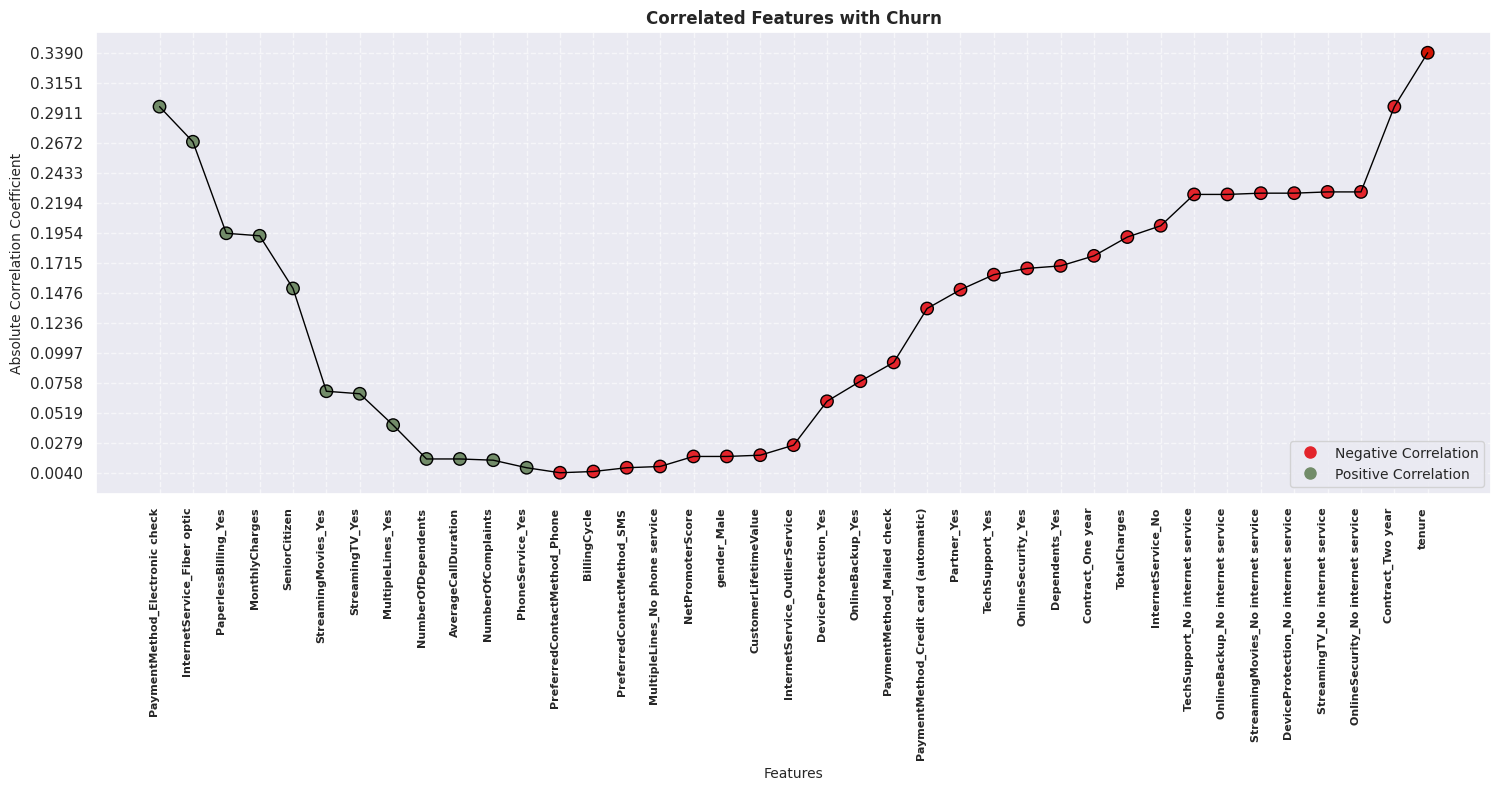

In [ ]:
import matplotlib.lines as mlines   # For custom legend

# Convert correlation values to absolute and sort
corr_abs = corr_churn.sort_values(ascending=False).map(lambda x: abs(x))

# Assign colors based on original correlation values
colors = [get_color(val) for val in corr_churn.loc[corr_abs.index]]  # Match sorted order

# Create figure
plt.figure(figsize=(18, 6))

# Plot line connecting all points
plt.plot(corr_abs.index, corr_abs.values, linestyle='-', color='black', linewidth=1)  # Line in gray

# Plot individual points with color
plt.scatter(corr_abs.index, corr_abs.values, c=colors, edgecolors='black', s=80)  # Colored markers

# Adjust y-tick spacing
y_min, y_max = corr_abs.min(), corr_abs.max()
plt.yticks(np.linspace(y_min, y_max, num=15))

plt.xticks(rotation=90, fontsize=8, ha='right', fontweight='bold')
plt.title('Correlated Features with Churn', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Absolute Correlation Coefficient', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Create custom legend markers
red_circle = mlines.Line2D([], [], color='#E3242B', marker='o', linestyle='None', markersize=8, label='Negative Correlation')
green_circle = mlines.Line2D([], [], color='#728C69', marker='o', linestyle='None', markersize=8, label='Positive Correlation')

# Add legend to the plot
plt.legend(handles=[red_circle, green_circle], loc='lower right', fontsize=10)
# Show the plot
plt.show()

In [48]:
x = df.drop("Churn",axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'CustomerLifetimeValue', 'NetPromoterScore', 'AverageCallDuration',
       'NumberOfComplaints', 'BillingCycle', 'NumberOfDependents',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'InternetService_OutlierService', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'Paym

((4586, 39), (4586,), (1966, 39), (1966,))

In [76]:
import time

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [87]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Selected features based on analysis
selected_features = optimal_features.tolist()[:10]

# Initialize results dictionary for training
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply models and calculate metrics for training
for algorithm in algorithms:
    start_time = time.time()

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train[selected_features], y_train)
    y_train_pred = algorithm.predict(X_train[selected_features])

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)

    end_time = time.time()
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create dataframe for training results
df_train = pd.DataFrame(results_train)
df_train

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.787396,0.771533,0.787396,0.771752,0.140581
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.134862
2,KNeighborsClassifier,0.822503,0.813718,0.822503,0.814149,0.546497
3,GaussianNB,0.773223,0.771884,0.773223,0.772534,0.018493
4,AdaBoostClassifier,0.792194,0.776878,0.792194,0.774346,0.387140
5,GradientBoostingClassifier,0.820977,0.811712,0.820977,0.808643,1.333896
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.927007
7,XGBClassifier,0.990188,0.990185,0.990188,0.990159,0.224738
8,SVC,0.798081,0.785906,0.798081,0.774456,1.262135


In [93]:
# Initialize results dictionary for testing
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply models and calculate metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test[selected_features])

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create dataframe for test results
df_test = pd.DataFrame(results_test)
df_test.sort_values(by = 'Accuracy', ascending = False)

,Algorithm,Accuracy,Precision,Recall,F1-score
8,SVC,0.797050,0.788159,0.797050,0.775072
6,RandomForestClassifier,0.787894,0.774503,0.787894,0.772934
4,AdaBoostClassifier,0.787386,0.773849,0.787386,0.769064
5,GradientBoostingClassifier,0.786877,0.773322,0.786877,0.772064
0,LogisticRegression,0.786368,0.772698,0.786368,0.771411
3,GaussianNB,0.775178,0.774146,0.775178,0.774648
7,XGBClassifier,0.772126,0.757580,0.772126,0.759950
2,KNeighborsClassifier,0.767548,0.751882,0.767548,0.754367
1,DecisionTreeClassifier,0.724822,0.724982,0.724822,0.724902


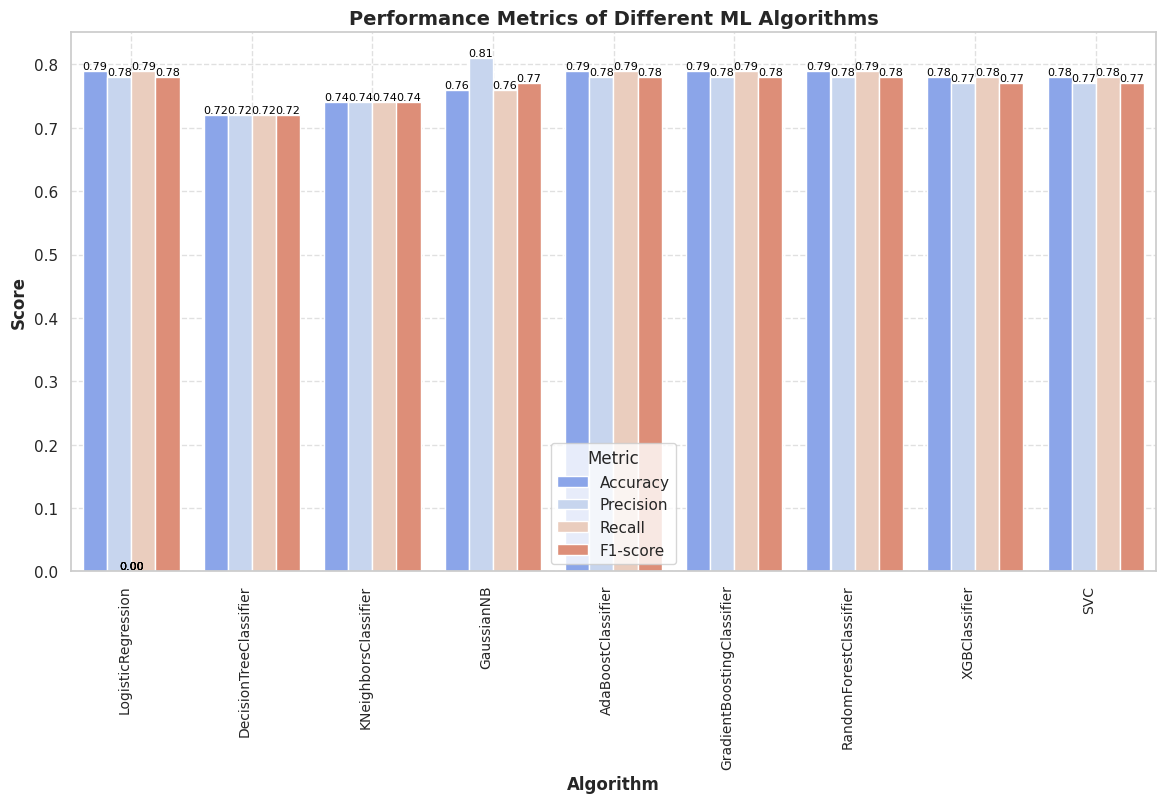

In [98]:
# Convert results to a long format suitable for hue use
results_melted = results_df.melt(id_vars=["Algorithm"],
                                  value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
                                  var_name="Metric", value_name="Score").round(2)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a bar plot with 'Metric' as hue
plt.figure(figsize=(14,7))
ax = sns.barplot(x="Algorithm", y="Score", hue="Metric", data=results_melted, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha="right", fontsize = 10)

# Add labels and title
plt.xlabel("Algorithm", fontsize = 12, fontweight = 'bold' , ha = 'center' )
plt.ylabel("Score", fontsize = 12, fontweight = 'bold' , ha = 'center')
plt.title("Performance Metrics of Different ML Algorithms", fontsize = 14, fontweight = 'bold' , ha = 'center')
plt.grid(linestyle='dashed', alpha=0.6)

# Show the exact score values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

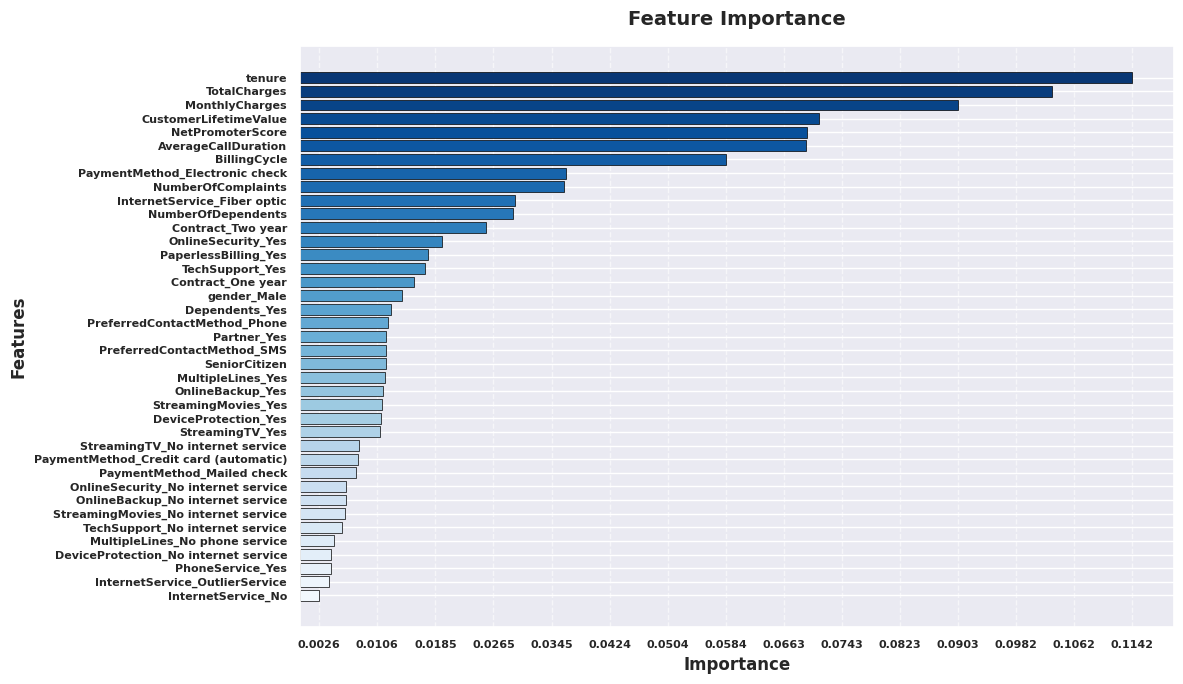

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Define color gradient
colors = sns.color_palette("Blues", len(feature_importance_df))

# Plot
plt.figure(figsize=(12, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors, edgecolor='black', linewidth=0.5)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance', fontsize=14, fontweight='bold', pad=15)

# Styling
plt.title('RF Feature Importance', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')

#adjust axis coefficients
# Adjust y-tick spacing
x_min, x_max = feature_importance_df['Importance'].min(), feature_importance_df['Importance'].max()
plt.xticks(np.linspace(x_min, x_max, num=15))
plt.xticks(fontsize=8, fontweight = 'bold')
plt.yticks(fontsize=8, fontweight = 'bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


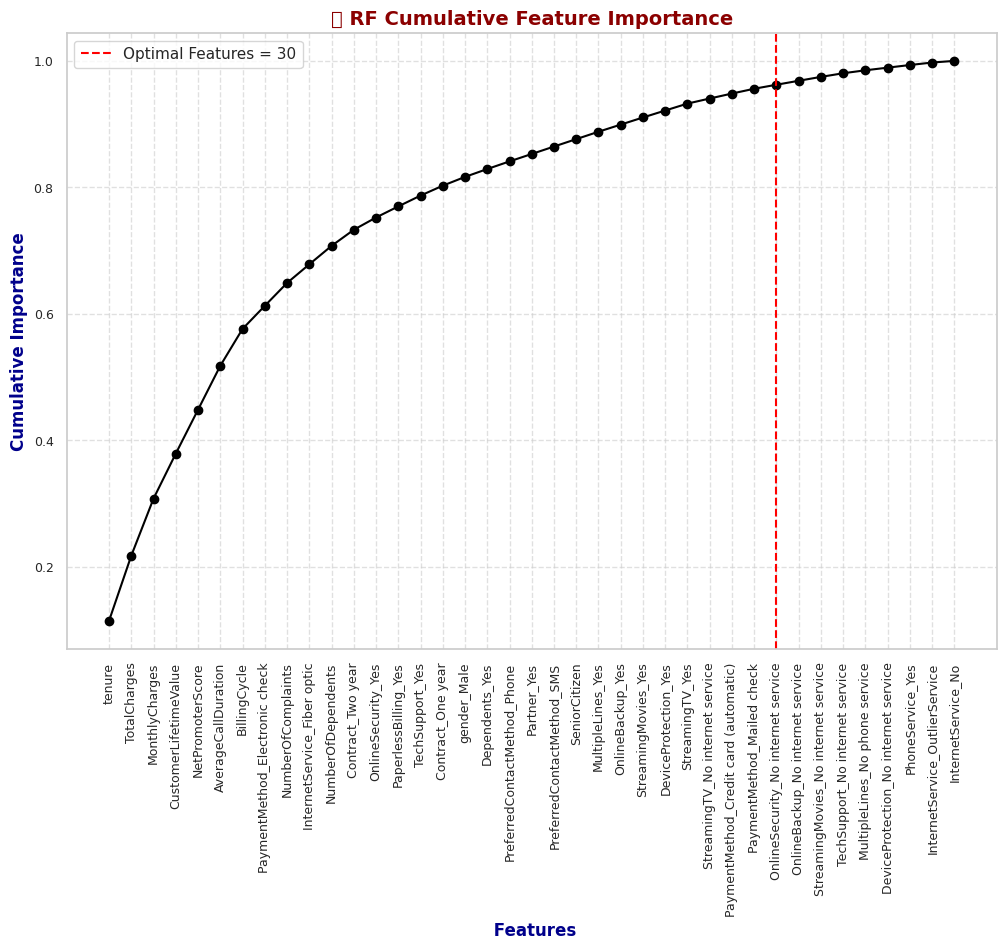



🔹 Feature Importance Ranking:
1. tenure: 0.1142
2. TotalCharges: 0.2173
3. MonthlyCharges: 0.3075
4. CustomerLifetimeValue: 0.3787
5. NetPromoterScore: 0.4481
6. AverageCallDuration: 0.5176
7. BillingCycle: 0.5759
8. PaymentMethod_Electronic check: 0.6125
9. NumberOfComplaints: 0.6486
10. InternetService_Fiber optic: 0.6781
11. NumberOfDependents: 0.7073
12. Contract_Two year: 0.7328
13. OnlineSecurity_Yes: 0.7522
14. PaperlessBilling_Yes: 0.7698
15. TechSupport_Yes: 0.7869
16. Contract_One year: 0.8026
17. gender_Male: 0.8165
18. Dependents_Yes: 0.8289
19. PreferredContactMethod_Phone: 0.8410
20. Partner_Yes: 0.8527
21. PreferredContactMethod_SMS: 0.8645
22. SeniorCitizen: 0.8762
23. MultipleLines_Yes: 0.8879
24. OnlineBackup_Yes: 0.8992
25. StreamingMovies_Yes: 0.9105
26. DeviceProtection_Yes: 0.9215
27. StreamingTV_Yes: 0.9324
28. StreamingTV_No internet service: 0.9405
29. PaymentMethod_Credit card (automatic): 0.9483
30. PaymentMethod_Mailed check: 0.9559
31. OnlineSecurity_No i

In [171]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 🔹 Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 🔹 Extract feature names from feature_importance_df
sorted_features = feature_importance_df.sort_values(by="Importance", ascending=False)["Feature"].values

# 🔹 Compute cumulative importance
cumulative_importance = np.cumsum(feature_importance_df.sort_values(by="Importance", ascending=False)["Importance"].values)

# 🔹 Find the optimal number of features (90-95% of cumulative importance)
threshold = 0.95
optimal_num_features = np.argmax(cumulative_importance >= threshold) + 1
Cumulativeoptimal_features = sorted_features[:optimal_num_features]

# 🔹 Plot Cumulative Importance
plt.figure(figsize=(12,8))
plt.plot(sorted_features, cumulative_importance, color='black', marker='o', linestyle='-')
plt.axvline(optimal_num_features, color='red', linestyle='--', label=f'Optimal Features = {optimal_num_features}')
plt.xlabel(' Features', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Cumulative Importance', fontsize=12, fontweight='bold', color='darkblue')
plt.title('📊 RF Cumulative Feature Importance', fontsize=14, fontweight='bold', color='darkred')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9, rotation = 90)
plt.grid(linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 🔹 Print feature importance ranking
print("\n\n🔹 Feature Importance Ranking:")
for i, (feature, importance) in enumerate(zip(sorted_features,cumulative_importance)):
    print(f"{i+1}. {feature}: {importance:.4f}")

# 🔹 Print optimal features covering 95% importance
print("\n✅ Optimal Features (covering 95% importance):")
print(Cumulativeoptimal_features)


In [73]:
x = df[optimal_features.tolist()]
y = df['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((4586, 30), (4586,), (1966, 30), (1966,))

In [192]:
from sklearn.inspection import permutation_importance

# Compute permutation importance using a trained model (e.g., Random Forest)
result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42)

# Extract mean importance scores
importances_perm = result.importances_mean

# Create DataFrame to store results
perm_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance (%)': importances_perm * 100})

# Sort features by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance (%)', ascending=False)


In [193]:
# Display results
print('PI Importance Score\n', perm_importance_df)

PI Importance Score
                                   Feature  Importance (%)
1                                  tenure        3.468973
16            InternetService_Fiber optic        1.703967
2                          MonthlyCharges        1.434385
3                            TotalCharges        1.414039
33                   PaperlessBilling_Yes        1.266531
32                      Contract_Two year        0.981689
20                     OnlineSecurity_Yes        0.605290
5                        NetPromoterScore        0.574771
4                   CustomerLifetimeValue        0.478128
27        StreamingTV_No internet service        0.462869
25        TechSupport_No internet service        0.422177
35         PaymentMethod_Electronic check        0.381485
31                      Contract_One year        0.371312
26                        TechSupport_Yes        0.335707
0                           SeniorCitizen        0.325534
8                            BillingCycle        0.

In [194]:
perm_importance_df.columns = ['Feature' ,'Importance']

In [195]:

# 🔹 Extract feature names from feature_importance_df
sorted_features = perm_importance_df["Feature"].values

# 🔹 Compute cumulative importance
cumulative_importance = np.cumsum(perm_importance_df["Importance"].values)

# 🔹 Find the optimal number of features covering 90-95% importance
threshold = 0.95  # Set threshold to 95%
optimal_num_features = np.argmax(cumulative_importance >= threshold) + 1
PIoptimal_features = sorted_features[:optimal_num_features]


# 🔹 Print optimal features covering 95% importance
print("\n✅ Optimal Features (covering 95% importance):")
print(PIoptimal_features)


✅ Optimal Features (covering 95% importance):
['tenure']


<ipython-input-191-19ebf7f032ad>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(perm_importance_df))


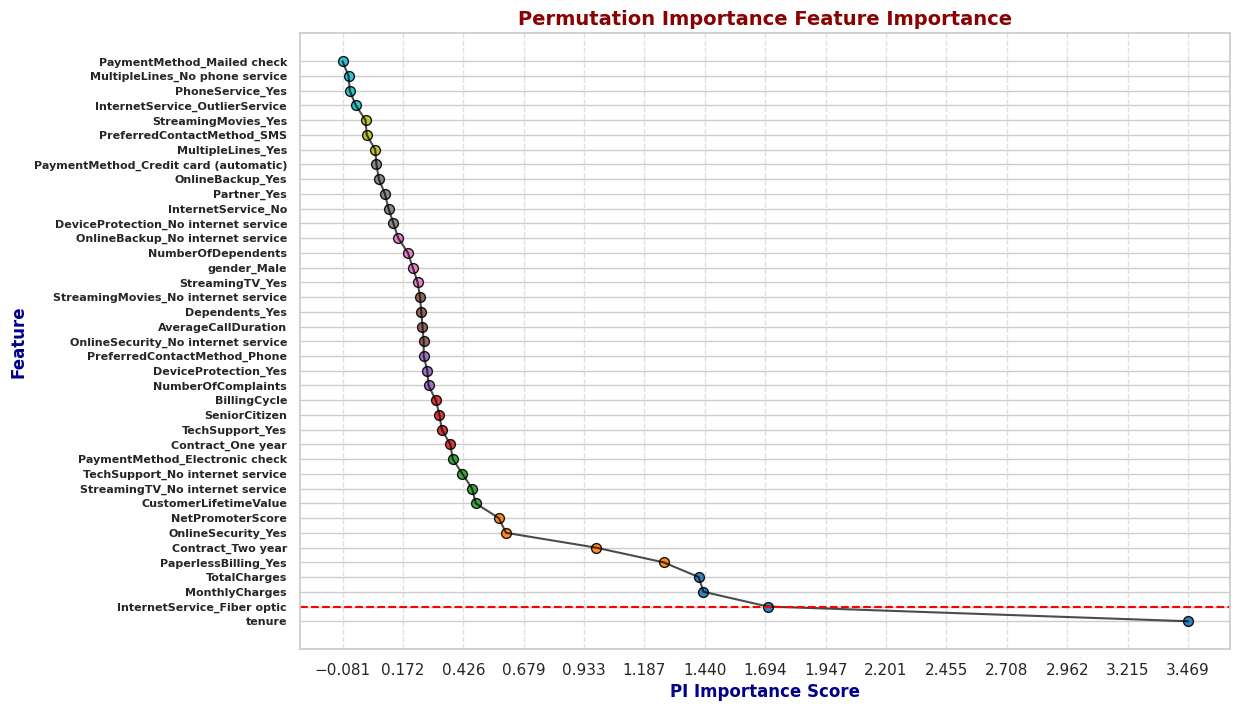


✅ Optimal Features (covering 95% importance):
['tenure']


In [191]:
# Generate unique colors for each feature
colors = plt.cm.get_cmap("tab10", len(perm_importance_df))

# Create a figure
plt.figure(figsize=(12, 8))  # 🔹 Increased figure width to fit labels

# Line plot with black color
plt.plot( perm_importance_df['Importance'],perm_importance_df['Feature'],linestyle='-', color='black', alpha=0.7, linewidth=1.5)

# Scatter points with unique colors
for i, row in enumerate(perm_importance_df.itertuples()):
    plt.scatter(row.Importance, i,color=colors(i / len(perm_importance_df)),
                s=50, edgecolors='black', alpha=0.9)

plt.axhline(optimal_num_features, color='red', linestyle='--', label=f'Optimal Features = {optimal_num_features}')
# Improve readability
plt.yticks(ticks=range(len(perm_importance_df)), labels=perm_importance_df['Feature'], rotation=0, ha='right', fontsize=8, fontweight='bold')
plt.xlabel("PI Importance Score", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Feature", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Permutation Importance Feature Importance", fontsize=14, fontweight='bold', color='darkred')

x_min, x_max = perm_importance_df["Importance"].min(), perm_importance_df['Importance'].max()
plt.xticks(np.linspace(x_min, x_max, num=15))

# Add grid
plt.grid(axis='x', linestyle='dashed', alpha=0.6)

# Show the plot
plt.show()


In [119]:
from sklearn.model_selection import train_test_split

# Define feature columns (excluding the target variable 'Churn')
feature_columns = [col for col in df.columns if col != 'Churn']

# Define the target variable
target_column = 'Churn'


# Assign features to categories
demographics = ['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']
service_usage = ['tenure', 'AverageCallDuration', 'NumberOfComplaints', 'PhoneService_Yes', 'MultipleLines_Yes']
billing = ['MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes',
           'PaymentMethod_Credit card (automatic)',
           'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Print column names for verification
print('X_train_demographics columns:', demographics)
print('-' * 120)
print('X_train_usage columns:', service_usage)
print('-' * 120)
print('X_train_billing columns:',billing)

X_train_demographics columns: ['SeniorCitizen', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']
------------------------------------------------------------------------------------------------------------------------
X_train_usage columns: ['tenure', 'AverageCallDuration', 'NumberOfComplaints', 'PhoneService_Yes', 'MultipleLines_Yes']
------------------------------------------------------------------------------------------------------------------------
X_train_billing columns: ['MonthlyCharges', 'TotalCharges', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [115]:
# Extract feature importance from trained RandomForest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame with feature names and importance values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})


# Aggregate importance per category
category_importance = {
    'Demographics': feature_importance_df[feature_importance_df['Feature'].isin(demographics)]['Importance'].sum(),
    'Service Usage': feature_importance_df[feature_importance_df['Feature'].isin(service_usage)]['Importance'].sum(),
    'Billing': feature_importance_df[feature_importance_df['Feature'].isin(billing)]['Importance'].sum()
}

# Convert to DataFrame
category_importance_df = pd.DataFrame.from_dict(category_importance, orient='index', columns=['Importance'])
category_importance_df = category_importance_df.sort_values(by='Importance', ascending=False)

# Display aggregated importance per category
print(category_importance_df)

               Importance
Billing          0.262888
Service Usage    0.235631
Demographics     0.049859


<ipython-input-116-0b7dc8201b60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_importance_df.index, y=category_importance_df['Importance'], palette="coolwarm")


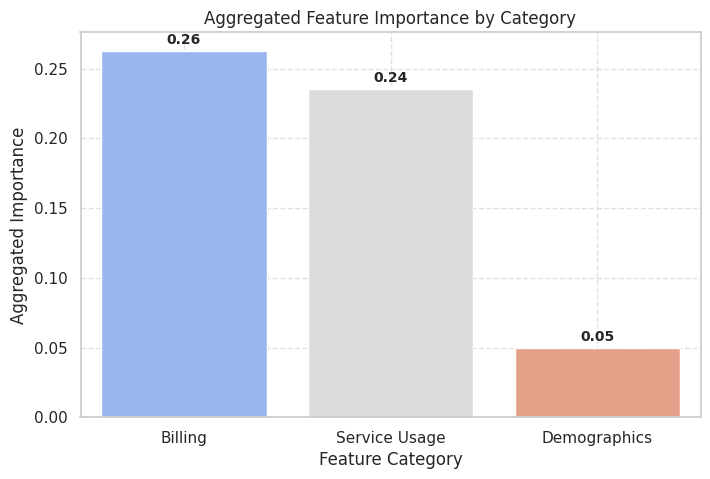

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Plot aggregated feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=category_importance_df.index, y=category_importance_df['Importance'], palette="coolwarm")

# Add labels
plt.xlabel("Feature Category")
plt.ylabel("Aggregated Importance")
plt.title("Aggregated Feature Importance by Category")
plt.grid(linestyle='dashed', alpha=0.6)

# Show value labels
for i, value in enumerate(category_importance_df['Importance']):
    plt.text(i, value + 0.005, f"{value:.2f}", ha="center", fontsize=10, fontweight='bold')

plt.show()


In [196]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': mi*100}).sort_values(by='Importance', ascending=False)

In [197]:
# Display results
print('MI Importance Score\n', perm_importance_df)

MI Importance Score
                                   Feature  Importance
1                                  tenure    3.468973
16            InternetService_Fiber optic    1.703967
2                          MonthlyCharges    1.434385
3                            TotalCharges    1.414039
33                   PaperlessBilling_Yes    1.266531
32                      Contract_Two year    0.981689
20                     OnlineSecurity_Yes    0.605290
5                        NetPromoterScore    0.574771
4                   CustomerLifetimeValue    0.478128
27        StreamingTV_No internet service    0.462869
25        TechSupport_No internet service    0.422177
35         PaymentMethod_Electronic check    0.381485
31                      Contract_One year    0.371312
26                        TechSupport_Yes    0.335707
0                           SeniorCitizen    0.325534
8                            BillingCycle    0.310275
7                      NumberOfComplaints    0.279756
24     

In [200]:
# 🔹 Extract feature names from feature_importance_df
sorted_features = mi_df["Feature"].values

# 🔹 Compute cumulative importance
cumulative_importance = np.cumsum(mi_df["Importance"].values)

# 🔹 Find the optimal number of features covering 90-95% importance
threshold = 0.95  # Set threshold to 95%
optimal_num_features = np.argmax(cumulative_importance >= threshold) + 1
MIoptimal_features = sorted_features[:optimal_num_features]


# 🔹 Print optimal features covering 95% importance
print("\n✅ Optimal Features (covering 95% importance):")
print(MIoptimal_features)


✅ Optimal Features (covering 95% importance):
['tenure']


<ipython-input-199-1e826ebb2987>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(mi_df))


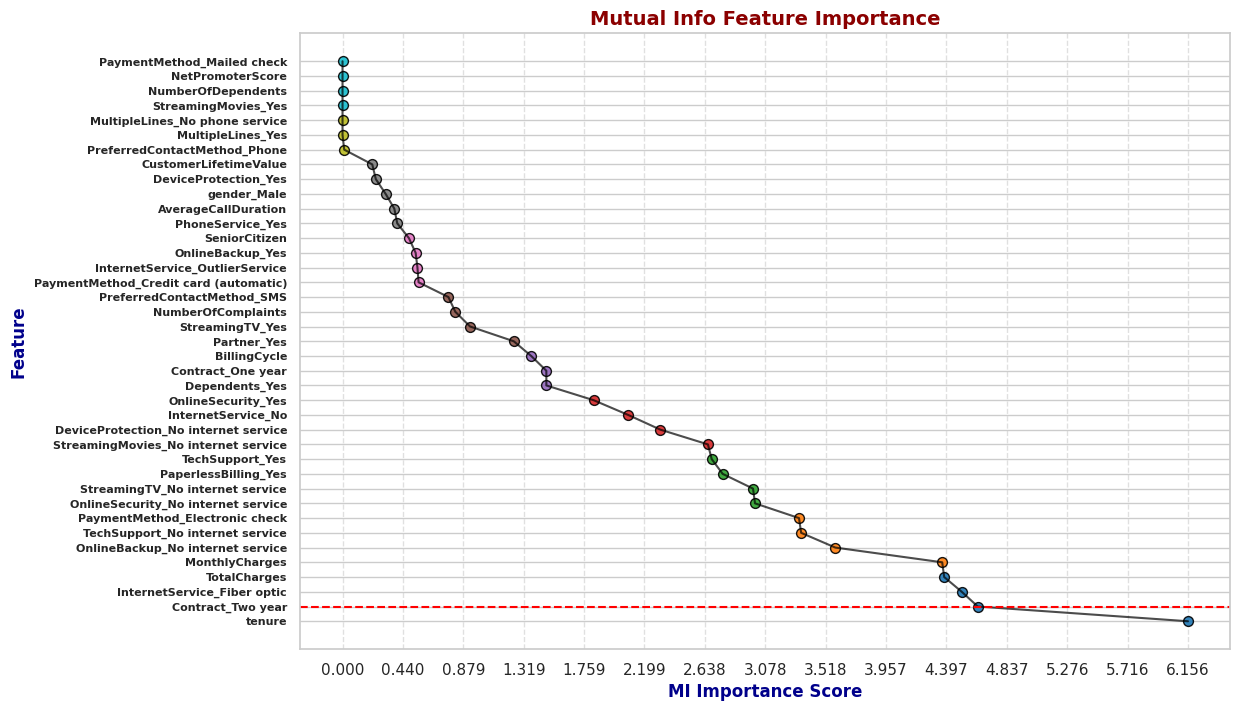

In [199]:
# Generate unique colors for each feature
colors = plt.cm.get_cmap("tab10", len(mi_df))

# Create a figure
plt.figure(figsize=(12, 8))  # 🔹 Increased figure width to fit labels

# Line plot with black color
plt.plot( mi_df['Importance'],mi_df['Feature'],linestyle='-', color='black', alpha=0.7, linewidth=1.5)

# Scatter points with unique colors
for i, row in enumerate(mi_df.itertuples()):
    plt.scatter(row.Importance, i,color=colors(i / len(mi_df)),
                s=50, edgecolors='black', alpha=0.9)

threshold = 0.95  # Set threshold to 95%
optimal_num_features = np.argmax(mi_df['Importance'].values >= threshold) + 1
MIoptimal_features = mi_df['Feature'].values[:optimal_num_features]

plt.axhline(optimal_num_features, color='red', linestyle='--', label=f'Optimal Features = {optimal_num_features}')

# Improve readability
plt.yticks(ticks=range(len(mi_df)), labels=mi_df['Feature'], rotation=0, ha='right', fontsize=8, fontweight='bold')
plt.xlabel("MI Importance Score", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Feature", fontsize=12, fontweight='bold', color='darkblue')
plt.title("Mutual Info Feature Importance", fontsize=14, fontweight='bold', color='darkred')

x_min, x_max = mi_df["Importance"].min(), mi_df['Importance'].max()
plt.xticks(np.linspace(x_min, x_max, num=15))

# Add grid
plt.grid(axis='x', linestyle='dashed', alpha=0.6)

# Show the plot
plt.show()

In [103]:
# Assuming X_train and y_train are defined as in your original code

def get_feature_importance(model, X_train):
  """Computes and returns feature importances for a given model."""
  try:
    # Try to access feature_importances_ attribute (for tree-based models)
    importances = model.feature_importances_
  except AttributeError:
      try:
          # Try to access coef_ attribute (for linear models)
          importances = np.abs(model.coef_[0]) # Take absolute value for magnitude
      except AttributeError:
          # Return None if neither attribute exists (e.g., KNN, SVM, Naive Bayes)
          return None
  return pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

models = [
    RandomForestClassifier(n_jobs=-1, random_state=42),
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
]


all_feature_importances = []
for model in models:
    model.fit(X_train, y_train)
    feature_importance = get_feature_importance(model, X_train)

    if feature_importance is not None:
        feature_importance['Model'] = type(model).__name__  # Add model name for identification
        all_feature_importances.append(feature_importance)

# Concatenate all feature importances into one DataFrame
if all_feature_importances:
    all_importances_df = pd.concat(all_feature_importances)

    # Aggregate feature importances across all models
    aggregated_importances = all_importances_df.groupby('Feature')['Importance'].mean().sort_values(ascending=False)

    print("\nAggregated Feature Importances (averaged across all models):")
    print(aggregated_importances)


Aggregated Feature Importances (averaged across all models):
Feature
Contract_Two year                        0.425293
tenure                                   0.363018
InternetService_Fiber optic              0.262418
Contract_One year                        0.245889
OnlineSecurity_No internet service       0.233232
PhoneService_Yes                         0.229055
PaperlessBilling_Yes                     0.160191
TechSupport_Yes                          0.158565
OnlineSecurity_Yes                       0.153569
StreamingTV_No internet service          0.152931
MonthlyCharges                           0.151073
InternetService_No                       0.145554
PaymentMethod_Electronic check           0.114911
Dependents_Yes                           0.094779
InternetService_OutlierService           0.085552
StreamingTV_Yes                          0.081522
TotalCharges                             0.080288
MultipleLines_Yes                        0.075506
StreamingMovies_Yes           

In [205]:
# 🔹 Extract feature names from feature_importance_df
sorted_features = aggregated_importances.index

# 🔹 Compute cumulative importance
cumulative_importance = np.cumsum(aggregated_importances.values)

# 🔹 Find the optimal number of features covering 90-95% importance
threshold = 0.95  # Set threshold to 95%
optimal_num_features = np.argmax(cumulative_importance >= threshold) + 1
Aggoptimal_features = sorted_features[:optimal_num_features]


# 🔹 Print optimal features covering 95% importance
print("\n✅ Optimal Features (covering 95% importance):")
print(Aggoptimal_features)


✅ Optimal Features (covering 95% importance):
Index(['Contract_Two year', 'tenure', 'InternetService_Fiber optic'], dtype='object', name='Feature')


<ipython-input-212-c8dd9aeacfba>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(aggregated_importances))  # Use 'tab10' colormap for distinct colors


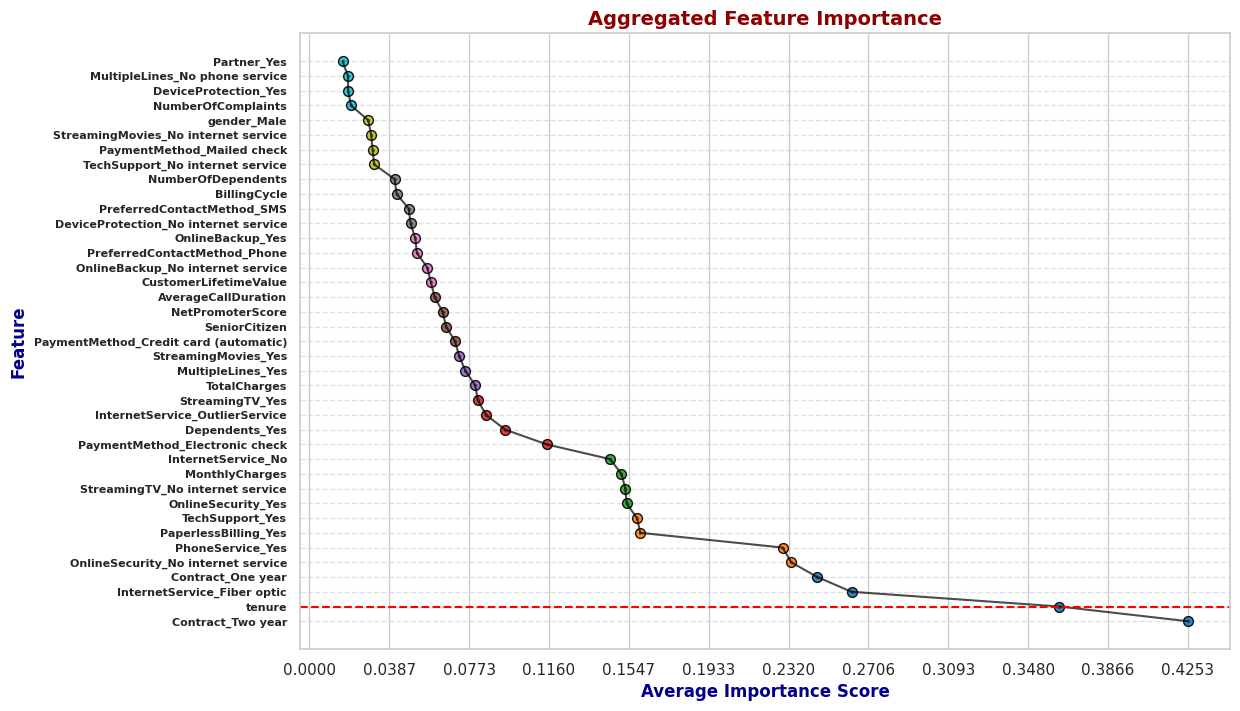

In [212]:
if all_feature_importances:

    # Generate unique colors for each feature
    colors = plt.cm.get_cmap("tab10", len(aggregated_importances))  # Use 'tab10' colormap for distinct colors

    # Create a figure
    plt.figure(figsize=(12, 8))

    # Line plot with different colors for each feature
    plt.plot( aggregated_importances.values, aggregated_importances.index,
             marker='o', linestyle='-', color='black', alpha=0.7, linewidth=1.5, markersize=1,markerfacecolor = 'white')

    # Scatter points with unique colors
    for i, (feature, importance) in enumerate(zip(aggregated_importances.index, aggregated_importances.values)):
        plt.scatter(importance,feature,  color=colors(i), s=50, edgecolors='black', alpha=0.9, label=feature)
    plt.axhline(optimal_num_features, color='red', linestyle='--', label=f'Optimal Features = {optimal_num_features}')
    # Improve readability
    plt.yticks(rotation=0, ha='right', fontsize=8, fontweight ='bold')
    plt.ylabel("Feature", fontsize=12, fontweight='bold', color='darkblue')
    plt.xlabel("Average Importance Score", fontsize=12, fontweight='bold', color='darkblue')
    plt.title("Aggregated Feature Importance", fontsize=14, fontweight='bold', color='darkred')

    # Adjust y-tick spacing
    x_min, x_max = 0.0000, aggregated_importances.max()
    plt.xticks(np.linspace(x_min, x_max, num = 12))  # Decrease the gap of x-ticks

    # Add grid
    plt.grid(axis='y', linestyle='dashed', alpha=0.6)

    # Show the plot
    plt.show()

In [223]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare data
X_train_clean = X_train.copy()
X_train_clean = pd.get_dummies(X_train_clean, drop_first=True)
X_train_clean = X_train_clean.astype(float)

# Replace infinite values with NaN, then drop NaNs
X_train_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_clean.dropna(inplace=True)

# Compute VIF
vif = pd.DataFrame()
vif["Variable"] = X_train_clean.columns
vif["VIF"] = [variance_inflation_factor(X_train_clean.values, i) for i in range(X_train_clean.shape[1])]

vif = vif.sort_values(by='VIF', ascending=False)
# Print VIF values
print('VIF SCORES\n', vif)

VIF SCORES
                                  Variable        VIF
29    StreamingMovies_No internet service  54.752288
19     OnlineSecurity_No internet service  53.563549
21       OnlineBackup_No internet service  53.021512
25        TechSupport_No internet service  52.678201
27        StreamingTV_No internet service  51.806051
23   DeviceProtection_No internet service  47.952976
13                       PhoneService_Yes  21.294930
2                          MonthlyCharges  10.948079
17                     InternetService_No   7.575831
3                            TotalCharges   6.035476
16            InternetService_Fiber optic   5.941499
1                                  tenure   4.557976
14         MultipleLines_No phone service   4.122079
30                    StreamingMovies_Yes   3.097139
35         PaymentMethod_Electronic check   3.090910
32                      Contract_Two year   3.074329
28                        StreamingTV_Yes   3.047118
33                   PaperlessBill

In [220]:
# 🔹 Extract feature names from feature_importance_df
sorted_features = vif["Variable"]

# 🔹 Compute cumulative importance
cumulative_importance = np.cumsum(vif["VIF"])

# 🔹 Find the optimal number of features covering 90-95% importance
threshold = 0.95  # Set threshold to 95%
optimal_num_features = np.argmax(cumulative_importance >= threshold) + 1
MIoptimal_features = sorted_features[:optimal_num_features]


# 🔹 Print optimal features covering 95% importance
print("\n✅ Optimal Features (covering 95% importance):")
print(MIoptimal_features)


✅ Optimal Features (covering 95% importance):
29    StreamingMovies_No internet service
Name: Variable, dtype: object


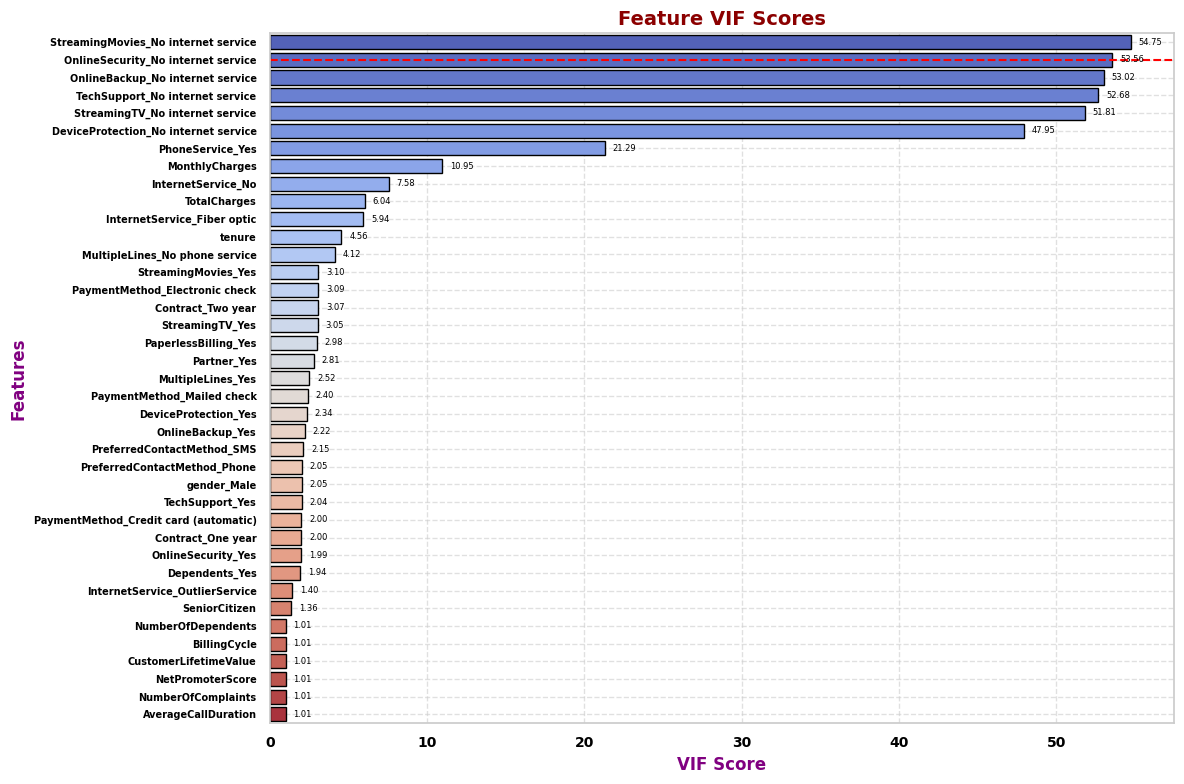

In [221]:

# Generate color palette
num_features = len(vif)
colors = sns.color_palette("coolwarm", n_colors=num_features)

# Plot VIF using Seaborn (Fix: Assign 'y' to hue, remove legend)
plt.figure(figsize=(12, 8))  # Bigger figure for clarity
sns.barplot(x="VIF", y="Variable", data=vif, hue="Variable", palette=colors, edgecolor="black", linewidth=1.0, legend=False)
plt.axhline(optimal_num_features, color='red', linestyle='--', label=f'Optimal Features = {optimal_num_features}')
# Improve readability
plt.title("Feature VIF Scores", fontsize=14, fontweight='bold', color='darkred')  # Removed emoji to avoid font issue
plt.xlabel("VIF Score", fontsize=12, fontweight='bold', color='Purple')
plt.ylabel("Features", fontsize=12, fontweight='bold', color='Purple')
plt.yticks(fontsize=7, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')

# Show values on bars
for index, value in enumerate(vif["VIF"]):
    plt.text(value + 0.5, index, f"{value:.2f}", va='center', fontsize=6, color='black')

# Adjust grid and layout
plt.grid(linestyle="dashed", alpha=0.6)
plt.xlim(0, max(vif["VIF"]) * 1.05)  # Adjust x-limit to provide spacing
plt.tight_layout()

# Show plot
plt.tight_layout()
plt.show()

[DATA CLEANING](https://colab.research.google.com/drive/11b-0GUu3f-7YyzjnXqU3FUBvKD1ytw2R?usp=sharing)

[DATA PREPROCESSING](https://colab.research.google.com/drive/1AQBcKVxGiXY2NCyCf5Ow9rdjsuDVUpQ2?usp=drive_link)


Feature Importance Insights
Top Features Across All Models:



*   Contract_Two year (Highly important in multiple rankings)
*   tenure
*   InternetService_Fiber option
*   OnlineSecurity_Yes
*   PaperlessBilling_Yes
*   TechSupport_Yes
*   MonthlyCharges
*   PaymentMethod_Electronic check
*   TotalCharges
*   Dependents_Yes


**Low Importance Features (Consider Removing):**

1. gender_Male
2. PreferredContactMethod_SMS
3. InternetService_OutlierService
4. PhoneService_Yes
5. MultipleLines_No phone service

🔹 Actionable Steps for Feature Selection:

Keep high-ranking features like tenure, Contract_Two year,

* InternetService_Fiber optic, and OnlineSecurity_Yes.
* Consider dropping low-importance features to simplify the model.
*  Address multicollinearity before finalizing feature selection.





